In [1]:
from preamble import *
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

## Model Evaluation and Improvement

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


Cross-validation is a statistical method of evaluating generalization performance that
is more stable and thorough than using a split into a training and a test set. In crossvalidation, the data is instead split repeatedly and multiple models are trained. The
most commonly used version of cross-validation is k-fold cross-validation, where k is
a user-specified number, usually 5 or 10. When performing five-fold cross-validation,
the data is first partitioned into five parts of (approximately) equal size, called folds.
Next, a sequence of models is trained. The first model is trained using the first fold as
the test set, and the remaining folds (2–5) are used as the training set. The model is
built using the data in folds 2–5, and then the accuracy is evaluated on fold 1. Then
another model is built, this time using fold 2 as the test set and the data in folds 1, 3,
4, and 5 as the training set. This process is repeated using folds 3, 4, and 5 as test sets.
For each of these five splits of the data into training and test sets, we compute the
accuracy. In the end, we have collected five accuracy values.

### Cross-Validation

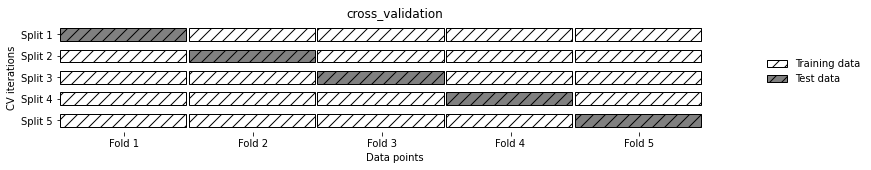

In [4]:
mglearn.plots.plot_cross_validation()

#### Cross-Validation in scikit-learn

Cross-validation is implemented in scikit-learn using the cross_val_score func‐
tion from the model_selection module. The parameters of the cross_val_score
function are the model we want to evaluate, the training data, and the ground-truth
labels.

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.967 1.    0.933 0.967 1.   ]


In [6]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.967 1.    0.933 0.967 1.   ]


In [7]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


Using the mean cross-validation we can conclude that we expect the model to be
around 96% accurate on average. Looking at all five scores produced by the five-fold
cross-validation, we can also conclude that there is a relatively high variance in the
accuracy between folds, ranging from 100% accuracy to 90% accuracy. This could
imply that the model is very dependent on the particular folds used for training, but it
could also just be a consequence of the small size of the dataset.


There are several benefits to using cross-validation instead of a single split into a
training and a test set. First, remember that train_test_split performs a random
split of the data. Imagine that we are “lucky” when randomly splitting the data, and
all examples that are hard to classify end up in the training set. In that case, the test
set will only contain “easy” examples, and our test set accuracy will be unrealistically
high. Conversely, if we are “unlucky,” we might have randomly put all the hard-toclassify examples in the test set and consequently obtain an unrealistically low score.
However, when using cross-validation, each example will be in the training set exactly
once: each example is in one of the folds, and each fold is the test set once. Therefore,
the model needs to generalize well to all of the samples in the dataset for all of the
cross-validation scores (and their mean) to be high.

Another benefit of cross-validation as compared to using a single split of the data is
that we use our data more effectively. When using train_test_split, we usually use
75% of the data for training and 25% of the data for evaluation. When using five-fold
cross-validation, in each iteration we can use four-fifths of the data (80%) to fit the
model. When using 10-fold cross-validation, we can use nine-tenths of the data
(90%) to fit the model. More data will usually result in more accurate models.
The main disadvantage of cross-validation is increased computational cost. As we are
now training k models instead of a single model, cross-validation will be roughly k
times slower than doing a single split of the data


It is important to keep in mind that cross-validation is not a way to
build a model that can be applied to new data. Cross-validation
does not return a model. When calling cross_val_score, multiple
models are built internally, but the purpose of cross-validation is
only to evaluate how well a given algorithm will generalize when
trained on a specific dataset.



In [8]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5,
                     return_train_score=True)
display(res)

{'fit_time': array([0.047, 0.054, 0.044, 0.028, 0.026]),
 'score_time': array([0.   , 0.001, 0.   , 0.   , 0.   ]),
 'test_score': array([0.967, 1.   , 0.933, 0.967, 1.   ]),
 'train_score': array([0.967, 0.967, 0.983, 0.983, 0.975])}

In [9]:
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.05,3.06e-04,0.97,0.97
1,0.05,7.09e-04,1.00,0.97
2,0.04,2.89e-04,0.93,0.98
3,0.03,2.86e-04,0.97,0.98
4,0.03,3.13e-04,1.00,0.97


Mean times and scores:
 fit_time       3.95e-02
score_time     3.81e-04
test_score     9.73e-01
train_score    9.75e-01
dtype: float64


#### Benefits of Cross-Validation

### Stratified K-Fold cross-validation and other strategies


Splitting the dataset into k folds by starting with the first one-k-th part of the data, as
described in the previous section, might not always be a good idea. For example, let’s
have a look at the iris dataset:

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


As you can see, the first third of the data is the class 0, the second third is the class 1,
and the last third is the class 2. Imagine doing three-fold cross-validation on this
dataset. The first fold would be only class 0, so in the first split of the data, the test set
would be only class 0, and the training set would be only classes 1 and 2. As the
classes in training and test sets would be different for all three splits, the three-fold
cross-validation accuracy would be zero on this dataset. That is not very helpful, as
we can do much better than 0% accuracy on iris.

As the simple k-fold strategy fails here, scikit-learn does not use it for classifica‐
tion, but rather uses stratified k-fold cross-validation. In stratified cross-validation, we
split the data such that the proportions between classes are the same in each fold as
they are in the whole dataset

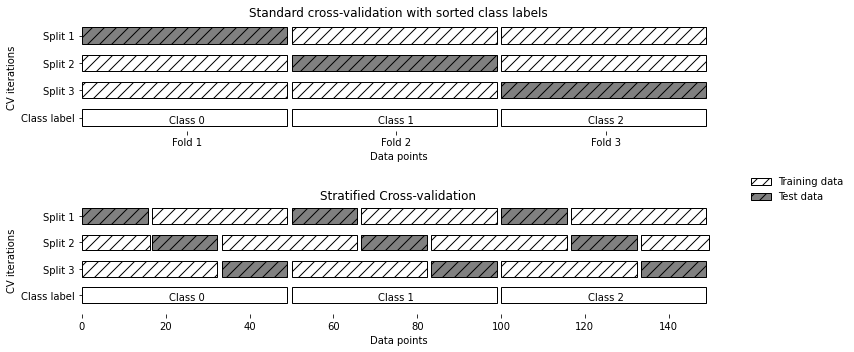

In [11]:
mglearn.plots.plot_stratified_cross_validation()

For example, if 90% of your samples belong to class A and 10% of your samples
belong to class B, then stratified cross-validation ensures that in each fold, 90% of
samples belong to class A and 10% of samples belong to class B.

It is usually a good idea to use stratified k-fold cross-validation instead of k-fold
cross-validation to evaluate a classifier, because it results in more reliable estimates of
generalization performance. In the case of only 10% of samples belonging to class B,
using standard k-fold cross-validation it might easily happen that one fold only con‐
tains samples of class A. Using this fold as a test set would not be very informative
about the overall performance of the classifier.


For regression, scikit-learn uses the standard k-fold cross-validation by default. It
would be possible to also try to make each fold representative of the different values
the regression target has, but this is not a commonly used strategy and would be sur‐
prising to most users.

#### More control over cross-validation

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [ ]:
print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Another frequently used cross-validation method is leave-one-out. You can think of
leave-one-out cross-validation as k-fold cross-validation where each fold is a single
sample. For each split, you pick a single data point to be the test set. This can be very
time consuming, particularly for large datasets, but sometimes provides better esti‐
mates on small datasets:

In [ ]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Remember: each fold corresponds to one of the classes in the iris dataset, and so
nothing can be learned. Another way to resolve this problem is to shuffle the data
instead of stratifying the folds, to remove the ordering of the samples by label. We can
do that by setting the shuffle parameter of KFold to True. If we shuffle the data, we
also need to fix the random_state to get a reproducible shuffling. Otherwise, each run
of cross_val_score would yield a different result, as each time a different split would
be used (this might not be a problem, but can be surprising). Shuffling the data before
splitting it yields a much better result:

In [ ]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

#### Leave-one-out cross-validation

Another, very flexible strategy for cross-validation is shue-split cross-validation. In
shuffle-split cross-validation, each split samples train_size many points for the
training set and test_size many (disjoint) point for the test set. This splitting is
repeated n_iter times. Figure 5-3 illustrates running four iterations of splitting a
dataset consisting of 10 points, with a training set of 5 points and test sets of 2 points
each (you can use integers for train_size and test_size to use absolute sizes for
these sets, or floating-point numbers to use fractions of the whole dataset):

The following code splits the dataset into 50% training set and 50% test set for 10
iterations:

Shuffle-split cross-validation allows for control over the number of iterations inde‐
pendently of the training and test sizes, which can sometimes be helpful. It also allows
for using only part of the data in each iteration, by providing train_size and
test_size settings that don’t add up to one. Subsampling the data in this way can be
useful for experimenting with large datasets.`

There is also a stratified variant of ShuffleSplit, aptly named StratifiedShuffleS
plit, which can provide more reliable results for classification tasks.

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

#### Shuffle-split cross-validation

Another very common setting for cross-validation is when there are groups in the
data that are highly related. Say you want to build a system to recognize emotions
from pictures of faces, and you collect a dataset of pictures of 100 people where each
person is captured multiple times, showing various emotions. The goal is to build a
classifier that can correctly identify emotions of people not in the dataset. You could
use the default stratified cross-validation to measure the performance of a classifier
here. However, it is likely that pictures of the same person will be in both the training
and the test set. It will be much easier for a classifier to detect emotions in a face that
is part of the training set, compared to a completely new face. To accurately evaluate
the generalization to new faces, we must therefore ensure that the training and test
sets contain images of different people.


To achieve this, we can use GroupKFold, which takes an array of groups as argument
that we can use to indicate which person is in the image. The groups array here indi‐
cates groups in the data that should not be split when creating the training and test
sets, and should not be confused with the class label.

This example of groups in the data is common in medical applications, where you
might have multiple samples from the same patient, but are interested in generalizing
to new patients. Similarly, in speech recognition, you might have multiple recordings
of the same speaker in your dataset, but are interested in recognizing speech of new
speakers.

The following is an example of using a synthetic dataset with a grouping given by the
groups array. The dataset consists of 12 data points, and for each of the data points,
groups specifies which group (think patient) the point belongs to. The groups specify
that there are four groups, and the first three samples belong to the first group, the
next four samples belong to the second group, and so on:

In [ ]:
mglearn.plots.plot_shuffle_split()

# Start here on Page 274 PDF

In [ ]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

##### Cross-validation with groups

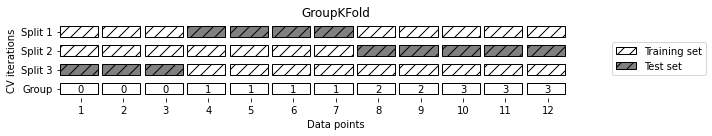

In [19]:
mglearn.plots.plot_group_kfold()

In [20]:
from sklearn.model_selection import GroupKFold
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75  0.6   0.667]


### Grid Search

#### Simple Grid Search

In [19]:
# naive grid search implementation
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

print("Size of training set: {} size of test set: {}".format(
 X_train.shape[0], X_test.shape[0]))
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


In [20]:
# naive grid search implementation
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("Size of training set: {}   size of test set: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


#### The danger of overfitting the parameters and the validation set

Given this result, we might be tempted to report that we found a model that performs
with 97% accuracy on our dataset. However, this claim could be overly optimistic (or
just wrong), for the following reason: we tried many different parameters and selected the one with best accuracy on the test set, but this accuracy won’t necessarily
carry over to new data. Because we used the test data to adjust the parameters, we can
no longer use it to assess how good the model is. This is the same reason we needed
to split the data into training and test sets in the first place; we need an independent
dataset to evaluate, one that was not used to create the model.

One way to resolve this problem is to split the data again, so we have three sets: the
training set to build the model, the validation (or development) set to select the
parameters of the model, and the test set to evaluate the performance of the selected
parameters. Figure 5-5 shows what this looks like:

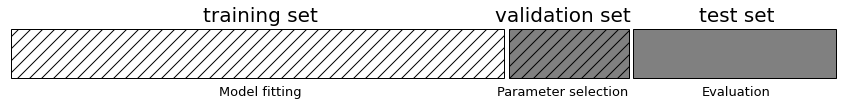

In [20]:
mglearn.plots.plot_threefold_split()

After selecting the best parameters using the validation set, we can rebuild a model
using the parameter settings we found, but now training on both the training data
and the validation data. This way, we can use as much data as possible to build our
model. This leads to the following implementation:

In [21]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
 iris.data, iris.target, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
 X_trainval, y_trainval, random_state=1)

print("Size of training set: {} size of validation set: {} size of test set:"
 " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84 size of validation set: 28 size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


The best score on the validation set is 96%: slightly lower than before, probably
because we used less data to train the model (X_train is smaller now because we split
our dataset twice). However, the score on the test set—the score that actually tells us
how well we generalize—is even lower, at 92%. So we can only claim to classify new
data 92% correctly, not 97% correctly as we thought before!


It is good practice to do all exploratory analysis and model selection using
the combination of a training and a validation set, and reserve the test set for a final
evaluation—this is even true for exploratory visualization. 

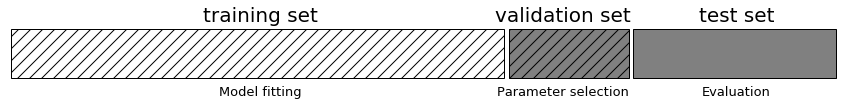

In [21]:
mglearn.plots.plot_threefold_split()

In [22]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validation set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84   size of validation set: 28   size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


#### Grid Search with Cross-Validation

While the method of splitting the data into a training, a validation, and a test set that
we just saw is workable, and relatively commonly used, it is quite sensitive to how
exactly the data is split. From the output of the previous code snippet we can see that
GridSearchCV selects 'C': 10, 'gamma': 0.001 as the best parameters, while the
output of the code in the previous section selects 'C': 100, 'gamma': 0.001 as the
best parameters. For a better estimate of the generalization performance, instead of
using a single split into a training and a validation set, we can use cross-validation to
evaluate the performance of each parameter combination. This method can be coded
up as follows:

In [22]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

To evaluate the accuracy of the SVM using a particular setting of C and gamma using
five-fold cross-validation, we need to train 36 * 5 = 180 models. As you can imagine,
the main downside of the use of cross-validation is the time it takes to train all these
models.

The following visualization (Figure 5-6) illustrates how the best parameter setting is
selected in the preceding code:

ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of ticklabels (36).

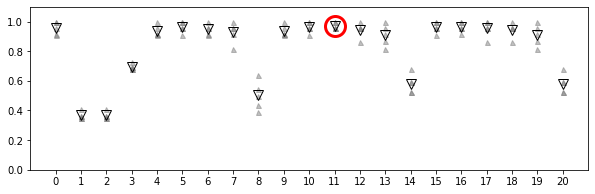

In [23]:
mglearn.plots.plot_cross_val_selection()

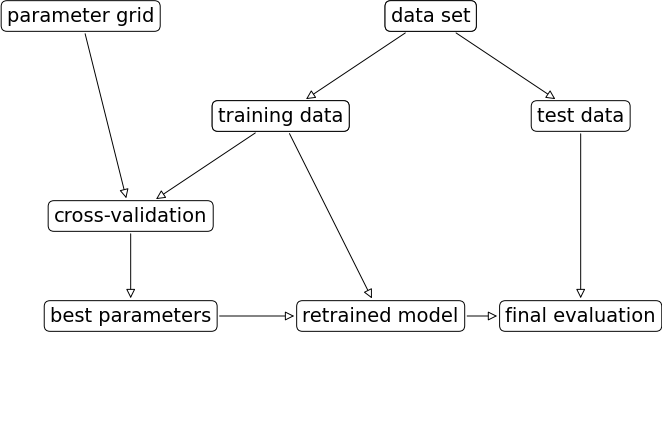

In [24]:
mglearn.plots.plot_grid_search_overview()

Because grid search with cross-validation is such a commonly used method to adjust
parameters, scikit-learn provides the GridSearchCV class, which implements it in
the form of an estimator. To use the GridSearchCV class, you first need to specify the
parameters you want to search over using a dictionary. GridSearchCV will then per‐
form all the necessary model fits. The keys of the dictionary are the names of parame‐
ters we want to adjust (as given when constructing the model—in this case, C and
gamma), and the values are the parameter settings we want to try out. Trying the val‐
ues 0.001, 0.01, 0.1, 1, 10, and 100 for C and gamma translates to the following
dictionary:

In [25]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [23]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

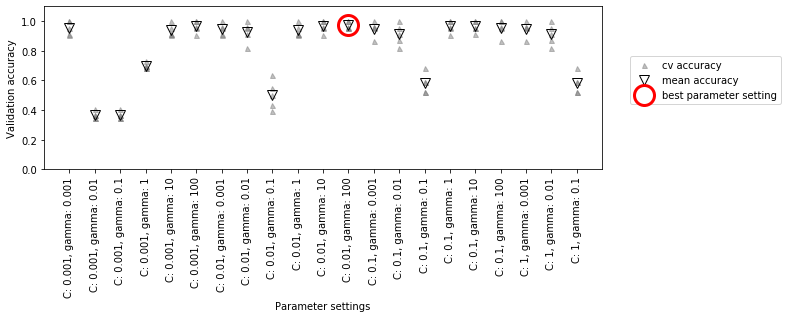

In [24]:
mglearn.plots.plot_cross_val_selection()

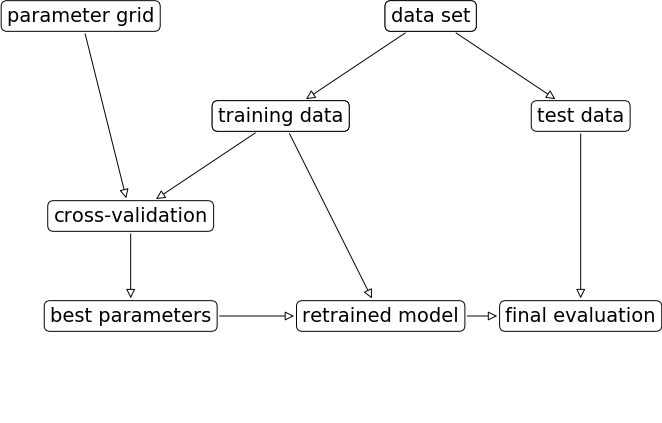

In [25]:
mglearn.plots.plot_grid_search_overview()

In [26]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)

GridSearchCV will use cross-validation in place of the split into a training and valida‐
tion set that we used before. However, we still need to split the data into a training
and a test set, to avoid overfitting the parameters:

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

The grid_search object that we created behaves just like a classifier; we can call the
standard methods fit, predict, and score on it.1
 However, when we call fit, it will
run cross-validation for each combination of parameters we specified in param_grid:

In [28]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

Fitting the GridSearchCV object not only searches for the best parameters, but also
automatically fits a new model on the whole training dataset with the parameters that
yielded the best cross-validation performance. What happens in fit is therefore
equivalent to the result of the In[21] code we saw at the beginning of this section. The
GridSearchCV class provides a very convenient interface to access the retrained
model using the predict and score methods. To evaluate how well the best found
parameters generalize, we can call score on the test set:

In [29]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [30]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


Again, be careful not to confuse best_score_ with the generaliza‐
tion performance of the model as computed by the score method
on the test set. Using the score method (or evaluating the output of
the predict method) employs a model trained on the whole train‐
ing set. The best_score_ attribute stores the mean cross-validation
accuracy, with cross-validation performed on the training set.

In [31]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


##### Analyzing the result of cross-validation

In [32]:
import pandas as pd
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,...,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.96e-03,1.88e-04,9.67e-04,8.01e-05,...,0.41,0.37,0.02,22
1,1.65e-03,1.60e-04,8.84e-04,4.31e-05,...,0.41,0.37,0.02,22
2,1.72e-03,3.83e-04,9.78e-04,1.86e-04,...,0.41,0.37,0.02,22
3,1.93e-03,2.28e-04,1.02e-03,5.55e-05,...,0.41,0.37,0.02,22
4,1.61e-03,1.08e-04,8.76e-04,5.78e-05,...,0.41,0.37,0.02,22


Each row in results corresponds to one particular parameter setting. For each set‐
ting, the results of all cross-validation splits are recorded, as well as the mean and
standard deviation over all splits. As we were searching a two-dimensional grid of
parameters (C and gamma), this is best visualized as a heat map (Figure 5-8). First we
extract the mean validation scores, then we reshape the scores so that the axes corre‐
spond to C and gamma:

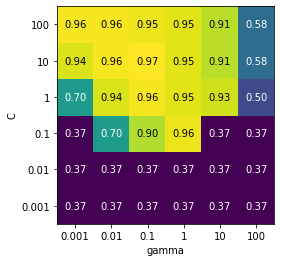

In [33]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

Each point in the heat map corresponds to one run of cross-validation, with a partic‐
ular parameter setting. The color encodes the cross-validation accuracy, with light
colors meaning high accuracy and dark colors meaning low accuracy. You can see
that SVC is very sensitive to the setting of the parameters. For many of the parameter
settings, the accuracy is around 40%, which is quite bad; for other settings the accu‐
racy is around 96%. We can take away from this plot several things. First, the parame‐
ters we adjusted are very important for obtaining good performance. Both parameters
(C and gamma) matter a lot, as adjusting them can change the accuracy from 40% to
96%. Additionally, the ranges we picked for the parameters are ranges in which we
see significant changes in the outcome. It’s also important to note that the ranges for
the parameters are large enough: the optimum values for each parameter are not on
the edges of the plot.
Now let’s look at some plots (shown in Figure 5-9) where the result is less ideal,
because the search ranges were not chosen properly:

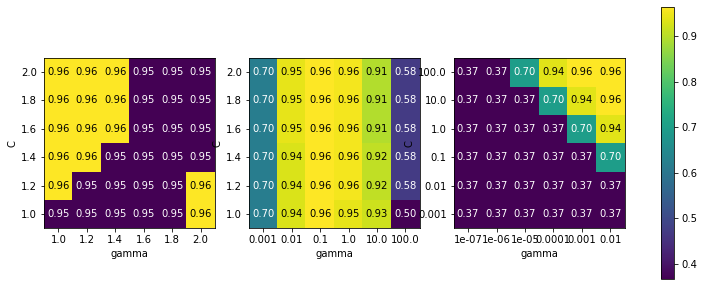

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

In some cases, trying all possible combinations of all parameters as GridSearchCV
usually does, is not a good idea. For example, SVC has a kernel parameter, and
depending on which kernel is chosen, other parameters will be relevant. If ker
nel='linear', the model is linear, and only the C parameter is used. If kernel='rbf',
both the C and gamma parameters are used (but not other parameters like degree). In
this case, searching over all possible combinations of C, gamma, and kernel wouldn’t
make sense: if kernel='linear', gamma is not used, and trying different values for
gamma would be a waste of time. To deal with these kinds of “conditional” parameters,
GridSearchCV allows the param_grid to be a list of dictionaries. Each dictionary in the
list is expanded into an independent grid. A possible grid search involving kernel and
parameters could look like this:

In [35]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [36]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


Let’s look at the cv_results_ again. As expected, if kernel is 'linear', then only C is
varied:

In [37]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,...,38,39,40,41
mean_fit_time,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
std_fit_time,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
mean_score_time,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
std_score_time,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0
param_C,0.0,0.0,0.0,0.0,...,0.1,1,10,100
param_gamma,0.0,0.01,0.1,1,...,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,...,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.35,0.35,0.35,0.35,...,1.0,1.0,1.0,0.96
split1_test_score,0.35,0.35,0.35,0.35,...,0.91,0.96,1.0,0.96


#### Using different cross-validation strategies with grid search

Similarly to cross_val_score, GridSearchCV uses stratified k-fold cross-validation
by default for classification, and k-fold cross-validation for regression. However, you
can also pass any cross-validation splitter, as described in “More control over crossvalidation” on page 256, as the cv parameter in GridSearchCV. In particular, to get
only a single split into a training and a validation set, you can use ShuffleSplit or
StratifiedShuffleSplit with n_iter=1. This might be helpful for very large data‐
sets, or very slow models.

#### Nested cross-validation

We can go a step further, and instead of splitting the original data
into training and test sets once, use multiple splits of cross-validation. This will result
in what is called nested cross-validation. In nested cross-validation, there is an outer
loop over splits of the data into training and test sets. For each of them, a grid search
is run (which might result in different best parameters for each split in the outer
loop). Then, for each outer split, the test set score using the best settings is reported.
The result of this procedure is a list of scores—not a model, and not a parameter set‐
ting. The scores tell us how well a model generalizes, given the best parameters found
by the grid. As it doesn’t provide a model that can be used on new data, nested crossvalidation is rarely used when looking for a predictive model to apply to future data.
However, it can be useful for evaluating how well a given model works on a particular
dataset.

In [38]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.967 1.    0.967 0.967 1.   ]
Mean cross-validation score:  0.9800000000000001


The result of our nested cross-validation can be summarized as “SVC can achieve 98%
mean cross-validation accuracy on the iris dataset”—nothing more and nothing
less

Here, we used stratified five-fold cross-validation in both the inner and the outer
loop. `

Here, we used the same cross-validation splitter in the inner
and the outer loop; however, this is not necessary and you can use any combination
of cross-validation strategies in the inner and outer loops. It can be a bit tricky to
understand what is happening in the single line given above, and it can be helpful to
visualize it as for loops, as done in the following simplified implementation:

In [39]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # for each split of the data in the outer cross-validation
    # (split method returns indices of training and test parts)
    for training_samples, test_samples in outer_cv.split(X, y):
        # find best parameter using inner cross-validation
        best_parms = {}
        best_score = -np.inf
        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits
            cv_scores = []
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # build classifier given parameters and training data
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = parameters
        # build classifier on best parameters using outer training set
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [40]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.967 1.    0.967 0.967 1.   ]


##### Parallelizing cross-validation and grid search

While running a grid search over many parameters and on large datasets can be com‐
putationally challenging, it is also embarrassingly parallel. This means that building a model using a particular parameter setting on a particular cross-validation split can
be done completely independently from the other parameter settings and models.
This makes grid search and cross-validation ideal candidates for parallelization over
multiple CPU cores or over a cluster. You can make use of multiple cores in Grid
SearchCV and cross_val_score by setting the n_jobs parameter to the number of
CPU cores you want to use. You can set n_jobs=-1 to use all available cores.


You should be aware that scikit-learn does not allow nesting of parallel operations.
So, if you are using the n_jobs option on your model (for example, a random forest),
you cannot use it in GridSearchCV to search over this model. If your dataset and
model are very large, it might be that using many cores uses up too much memory,
and you should monitor your memory usage when building large models in parallel.


For Spark users, there is also the recently developed spark-sklearn package, which
allows running a grid search over an already established Spark cluster.

### Evaluation Metrics and Scoring
#### Keep the End Goal in Mind

#### Metrics for Binary Classification
##### Kinds of errors
##### Imbalanced datasets

Often, accuracy is not a good measure of predictive performance, as the number of
mistakes we make does not contain all the information we are interested in.

In [41]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

We can use the DummyClassifier to always predict the majority class (here
“not nine”) to see how uninformative accuracy can be:

In [42]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [43]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


For comparison purposes, let’s evaluate two more classifiers, LogisticRegression
and the default DummyClassifier, which makes random predictions but produces
classes with the same proportions as in the training set:

In [44]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(max_iter=1000, C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.90
logreg score: 0.98


The dummy classifier that produces random output is clearly the worst of the lot
(according to accuracy), while LogisticRegression produces very good results.
However, even the random classifier yields over 80% accuracy. This makes it very
hard to judge which of these results is actually helpful. The problem here is that accu‐
racy is an inadequate measure for quantifying predictive performance in this imbal‐
anced setting.

##### Confusion matrices

In [45]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


The output of confusion_matrix is a two-by-two array, where the rows correspond
to the true classes and the columns correspond to the predicted classes. Each entry
counts how often a sample that belongs to the class corresponding to the row (here,
“not nine” and “nine”) was classified as the class corresponding to the column. The
following plot (Figure 5-10) illustrates this meaning:

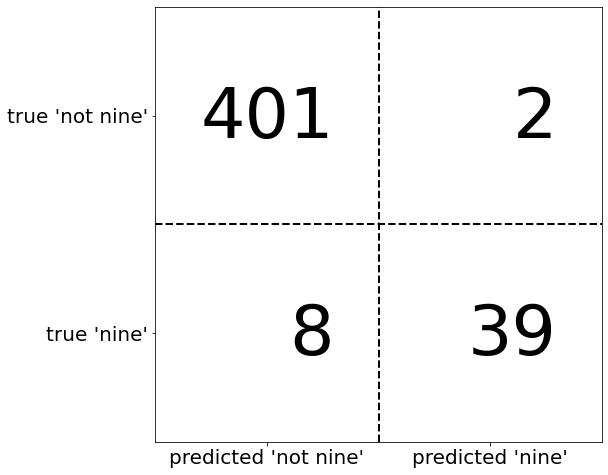

In [46]:
mglearn.plots.plot_confusion_matrix_illustration()

Entries on the main diagonal3
 of the confusion matrix correspond to correct classifi‐
cations, while other entries tell us how many samples of one class got mistakenly clas‐
sified as another class.

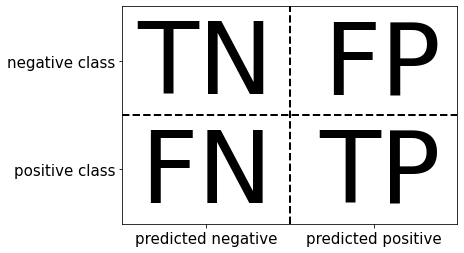

In [48]:
mglearn.plots.plot_binary_confusion_matrix()

In [49]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[403   0]
 [ 47   0]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


###### Relation to accuracy

However, inspecting the full confusion matrix is a bit cum‐
bersome, and while we gained a lot of insight from looking at all aspects of the
matrix, the process was very manual and qualitative. There are several ways to sum‐
marize the information in the confusion matrix, which we will discuss next.

\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

##### Precision, recall and f-score

 Precision measures
how many of the samples predicted as positive are actually positive:
- Precision is used as a performance metric when the goal is to limit the number of false positives. As an example, imagine a model for predicting whether a new drug will be effective in treating a disease in clinical trials. Clinical trials are notoriously expensive, and a pharmaceutical company will only want to run an experiment if it is very sure that the drug will actually work. Therefore, it is important that the model does not produce many false positives—in other words, that

Recall, on the other hand, measures how many of the positive samples are captured
by the positive predictions:

There is a trade-off between optimizing recall and optimizing precision. You can triv‐
ially obtain a perfect recall if you predict all samples to belong to the positive class—
there will be no false negatives, and no true negatives either. However, predicting all
samples as positive will result in many false positives, and therefore the precision will
be very low. On the other hand, if you find a model that predicts only the single data
point it is most sure about as positive and the rest as negative, then precision will be
perfect (assuming this data point is in fact positive), but recall will be very bad.

So, while precision and recall are very important measures, looking at only one of
them will not provide you with the full picture. One way to summarize them is the
f-score or f-measure, which is with the harmonic mean of precision and recall:


\begin{equation}
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

\begin{equation}
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}
\begin{equation}
\text{F} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
\end{equation}

In [50]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.00
f1 score tree: 0.55
f1 score logistic regression: 0.92


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
print(classification_report(y_test, pred_dummy,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
print(classification_report(y_test, pred_logreg,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



##### Taking uncertainty into account

 As we discussed in Chap‐
ter 2, most classifiers provide a decision_function or a predict_proba method to
assess degrees of certainty about predictions. Making predictions can be seen as
thresholding the output of decision_function or predict_proba at a certain fixed
point—in binary classification we use 0 for the decision function and 0.5 for
predict_proba.

The following is an example of an imbalanced binary classification task, with 400
points in the negative class classified against 50 points in the positive class. The train‐
ing data is shown on the left in Figure 5-12. We train a kernel SVM model on this
data, and the plots to the right of the training data illustrate the values of the decision
function as a heat map. You can see a black circle in the plot in the top center, which
denotes the threshold of the decision_function being exactly zero. Points inside this
circle will be classified as the positive class, and points outside as the negative class:

In [54]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

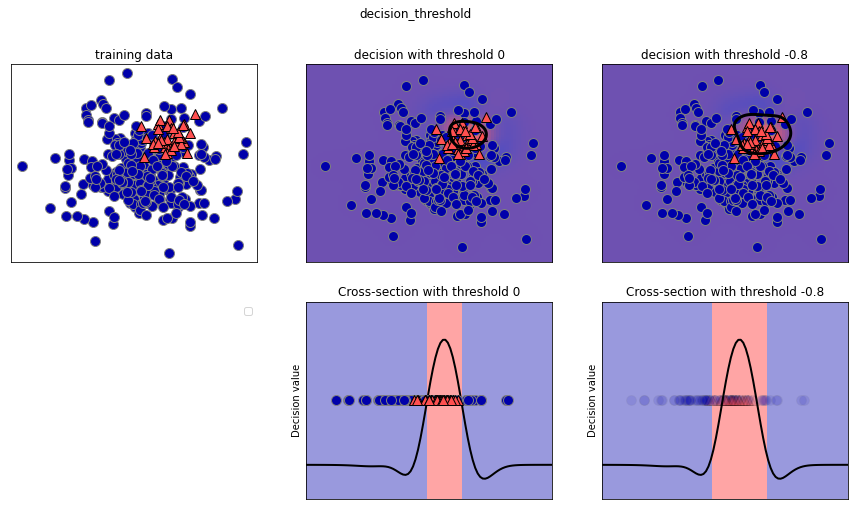

In [55]:
mglearn.plots.plot_decision_threshold()

We can use the classification_report function to evaluate precision and recall for
both classes:

In [56]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



We can use the classification_report function to evaluate precision and recall for
both classes:

In [57]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

Let’s look at the classification report for this prediction:

In [58]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



As expected, the recall of class 1 went up, and the precision went down. We are now
classifying a larger region of space as class 1, as illustrated in the top-right panel of
Figure 5-12. If you value precision over recall or the other way around, or your data is
heavily imbalanced, changing the decision threshold is the easiest way to obtain bet‐
ter results. As the decision_function can have arbitrary ranges, it is hard to provide
a rule of thumb regarding how to pick a threshold.

. This relates
to the concept of calibration: a calibrated model is a model that provides an accurate
measure of its uncertainty. 

As we just discussed, changing the threshold that is used to make a classification deci‐
sion in a model is a way to adjust the trade-off of precision and recall for a given clas‐
sifier. Maybe you want to miss less than 10% of positive samples, meaning a desired
recall of 90%. This decision depends on the application, and it should be driven by
business goals. Once a particular goal is set—say, a particular recall or precision value
for a class—a threshold can be set appropriately. It is always possible to set a thresh‐
old to fulfill a particular target, like 90% recall. The hard part is to develop a model
that still has reasonable precision with this threshold—if you classify everything as
positive, you will have 100% recall, but your model will be useless.




Setting a requirement on a classifier like 90% recall is often called setting the operat‐
ing point. Fixing an operating point is often helpful in business settings to make per‐
formance guarantees to customers or other groups inside your organization.
Often, when developing a new model, it is not entirely clear what the operating point
will be. For this reason, and to understand a modeling problem better, it is instructive
to look at all possible thresholds, or all possible trade-offs of precision and recalls at
once. This is possible using a tool called the precision-recall curve. 

##### Precision-Recall curves and ROC curves

In [59]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

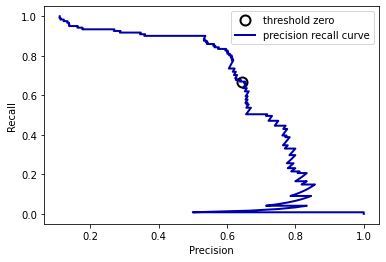

In [60]:
# Use more data points for a smoother curve
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

Different classifiers can work well in different parts of the curve—that is, at different
operating points. Let’s compare the SVM we trained to a random forest trained on the
same dataset. The RandomForestClassifier doesn’t have a decision_function, only
predict_proba. The precision_recall_curve function expects as its second argu‐
ment a certainty measure for the positive class (class 1), so we pass the probability of
a sample being class 1—that is, rf.predict_proba(X_test)[:, 1]. The default
threshold for predict_proba in binary classification is 0.5, so this is the point we
marked on the curve (see Figure 5-14):

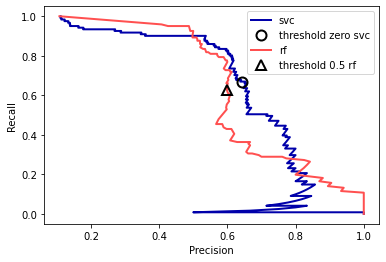

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

From the comparison plot we can see that the random forest performs better at the
extremes, for very high recall or very high precision requirements. Around the mid‐
dle (approximately precision=0.7), the SVM performs better. If we only looked at the
f1
-score to compare overall performance, we would have missed these subtleties. The
f1
-score only captures one point on the precision-recall curve, the one given by the
default threshold:

In [62]:
print("f1_score of random forest: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


Comparing two precision-recall curves provides a lot of detailed insight, but is a fairly
manual process. For automatic model comparison, we might want to summarize the
information contained in the curve, without limiting ourselves to a particular thresh‐
old or operating point. One particular way to summarize the precision-recall curve is
by computing the integral or area under the curve of the precision-recall curve, also
known as the average precision.
4
 You can use the average_precision_score function
to compute the average precision. Because we need to compute the ROC curve and
consider multiple thresholds, the result of decision_function or predict_proba
needs to be passed to average_precision_score, not the result of predict:

In [63]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


##### Receiver Operating Characteristics (ROC) and AUC

Similar to the precision-recall curve, the ROC curve considers all possible thresholds for a given classifier, but instead of reporting precision and recall, it shows
the false positive rate (FPR) against the true positive rate (TPR). 


\begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}

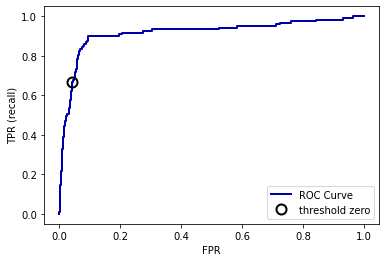

In [64]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

For the ROC curve, the ideal curve is close to the top left: you want a classifier that
produces a high recall while keeping a low false positive rate. Compared to the default
threshold of 0, the curve shows that we can achieve a significantly higher recall
(around 0.9) while only increasing the FPR slightly. The point closest to the top left
might be a better operating point than the one chosen by default. Again, be aware that
choosing a threshold should not be done on the test set, but on a separate validation
set.

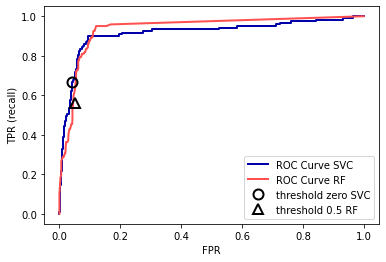

In [65]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

As for the precision-recall curve, we often want to summarize the ROC curve using a
single number, the area under the curve (this is commonly just referred to as the
AUC, and it is understood that the curve in question is the ROC curve). We can com‐
pute the area under the ROC curve using the roc_auc_score function:

In [66]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


Comparing the random forest and SVM using the AUC score, we find that the ran‐
dom forest performs quite a bit better than the SVM. Recall that because average pre‐
cision is the area under a curve that goes from 0 to 1, average precision always returns
a value between 0 (worst) and 1 (best). Predicting randomly always produces an AUC
of 0.5, no matter how imbalanced the classes in a dataset are. This makes AUC a
much better metric for imbalanced classification problems than accuracy.


 The AUC
can be interpreted as evaluating the ranking of positive samples. It’s equivalent to the
probability that a randomly picked point of the positive class will have a higher score
according to the classifier than a randomly picked point from the negative class. So, a
perfect AUC of 1 means that all positive points have a higher score than all negative
points. For classification problems with imbalanced classes, using AUC for model
selection is often much more meaningful than using accuracy.

gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.05  accuracy = 0.90  AUC = 1.00
gamma = 0.01  accuracy = 0.90  AUC = 1.00


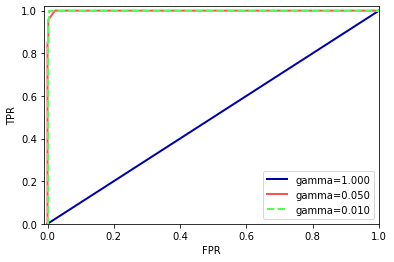

In [67]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
          gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

With gamma=1.0,
the AUC is actually at chance level, meaning that the output of the decision_func
tion is as good as random. With gamma=0.05, performance drastically improves to an
AUC of 0.5. Finally, with gamma=0.01, we get a perfect AUC of 1.0.


Keep in mind that AUC does not make use of the default threshold,
though, so adjusting the decision threshold might be necessary to obtain useful classi‐
fication results from a model with a high AUC.

#### Metrics for Multiclass Classification

In [68]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


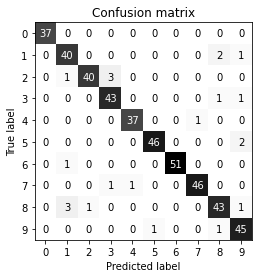

In [69]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [70]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



The most commonly used metric for imbalanced datasets in the multiclass setting is
the multiclass version of the f-score. The idea behind the multiclass f-score is to com‐
pute one binary f-score per class, with that class being the positive class and the other
classes making up the negative classes. Then, these per-class f-scores are averaged
using one of the following strategies:

- "macro" averaging computes the unweighted per-class f-scores. This gives equal weight to all classes, no matter what their size is.
- "weighted" averaging computes the mean of the per-class f-scores, weighted by their support. This is what is reported in the classification report.
- "micro" averaging computes the total number of false positives, false negatives, and true positives over all classes, and then computes precision, recall, and fscore using these counts.

If you care about each sample equally much, it is recommended to use the "micro"
average f1
-score; if you care about each class equally much, it is recommended to use
the "macro" average f1
-score:

In [71]:
print("Micro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.951
Macro average f1 score: 0.952


#### Regression metrics

Sometimes business decisions are made on the
basis of mean squared error or mean absolute error, which might give incentive to
tune models using these metrics. In general, though, we have found R
2
 to be a more
intuitive metric to evaluate regression models.

### Using evaluation metrics in model selection

We have discussed many evaluation methods in detail, and how to apply them given
the ground truth and a model. However, we often want to use metrics like AUC in
model selection using GridSearchCV or cross_val_score. Luckily scikit-learn
provides a very simple way to achieve this, via the scoring argument that can be used
in both GridSearchCV and cross_val_score. You can simply provide a string
describing the evaluation metric you want to use. Say, for example, we want to evalu‐
ate the SVM classifier on the “nine vs. rest” task on the digits dataset, using the AUC
score. Changing the score from the default (accuracy) to AUC can be done by provid‐
ing "roc_auc" as the scoring parameter:

In [71]:
# default scoring for classification is accuracy
print("Default scoring: {}".format(
    cross_val_score(SVC(), digits.data, digits.target == 9, cv=5)))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9,
                                     scoring="accuracy", cv=5)
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
roc_auc =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="roc_auc", cv=5)
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.975 0.992 1.    0.994 0.981]
Explicit accuracy scoring: [0.975 0.992 1.    0.994 0.981]
AUC scoring: [0.997 0.999 1.    1.    0.984]


In [72]:
res = cross_validate(SVC(), digits.data, digits.target == 9,
                     scoring=["accuracy", "roc_auc", "recall_macro"],
                     return_train_score=True, cv=5)
display(pd.DataFrame(res))

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.02,0.03,0.97,0.99,1.00,1.0,0.89,0.97
1,0.03,0.04,0.99,1.00,1.00,1.0,0.96,0.98
2,0.02,0.03,1.00,1.00,1.00,1.0,1.00,0.98
3,0.02,0.03,0.99,1.00,1.00,1.0,0.97,0.98
4,0.02,0.03,0.98,1.00,0.98,1.0,0.90,0.99


In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [74]:
# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
Test set accuracy: 1.000


In [75]:
from sklearn.metrics import SCORERS
print("Available scorers:")
print(sorted(SCORERS.keys()))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v

### Summary and Outlook